# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [36]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"{len(cities)}")

610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "d7a479a365ec89ff886458d92b6feac8"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={url}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | gagliano del capo
Processing Record 3 of Set 1 | pirane
Processing Record 4 of Set 1 | sihanoukville
Processing Record 5 of Set 1 | longyearbyen
Processing Record 6 of Set 1 | atafu village
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | ibotirama
Processing Record 9 of Set 1 | naraina
Processing Record 10 of Set 1 | udachny
Processing Record 11 of Set 1 | tidjikja
Processing Record 12 of Set 1 | tura
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | port mathurin
Processing Record 15 of Set 1 | boquira
Processing Record 16 of Set 1 | enewetak
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | makokou
Processing Record 19 of Set 1 | tchintabaraden
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | wailua homesteads
Processing Record 22 of Set 1 | p

Processing Record 42 of Set 4 | prince albert
Processing Record 43 of Set 4 | port lincoln
Processing Record 44 of Set 4 | yerofey pavlovich
Processing Record 45 of Set 4 | chegdomyn
Processing Record 46 of Set 4 | tranovaho
City not found. Skipping...
Processing Record 47 of Set 4 | tamanrasset
Processing Record 48 of Set 4 | dossor
Processing Record 49 of Set 4 | ciudad melchor muzquiz
Processing Record 0 of Set 5 | la ronge
Processing Record 1 of Set 5 | port augusta
Processing Record 2 of Set 5 | urangan
Processing Record 3 of Set 5 | beloyarskiy
Processing Record 4 of Set 5 | gunjur
Processing Record 5 of Set 5 | celestun
Processing Record 6 of Set 5 | nkurenkuru
City not found. Skipping...
Processing Record 7 of Set 5 | minas de marcona
Processing Record 8 of Set 5 | wucheng
Processing Record 9 of Set 5 | freetown
Processing Record 10 of Set 5 | pakur
Processing Record 11 of Set 5 | emerald
Processing Record 12 of Set 5 | polyarnyy
Processing Record 13 of Set 5 | kapa'a
Processin

Processing Record 37 of Set 8 | i-n-salah
Processing Record 38 of Set 8 | geraldton
Processing Record 39 of Set 8 | colonia general alfredo stroessner
Processing Record 40 of Set 8 | ixtapa
Processing Record 41 of Set 8 | robore
Processing Record 42 of Set 8 | suntar
Processing Record 43 of Set 8 | 'ohonua
City not found. Skipping...
Processing Record 44 of Set 8 | tanrake village
City not found. Skipping...
Processing Record 45 of Set 8 | lincoln city
Processing Record 46 of Set 8 | saudarkrokur
Processing Record 47 of Set 8 | hithadhoo
Processing Record 48 of Set 8 | sisimiut
Processing Record 49 of Set 8 | nagqu
Processing Record 0 of Set 9 | bamboo flat
Processing Record 1 of Set 9 | mazamari
Processing Record 2 of Set 9 | vila franca do campo
Processing Record 3 of Set 9 | dhuusamarreeb
Processing Record 4 of Set 9 | sodo
Processing Record 5 of Set 9 | north bend
Processing Record 6 of Set 9 | aykhal
Processing Record 7 of Set 9 | muroto-misakicho
Processing Record 8 of Set 9 | va

Processing Record 24 of Set 12 | kununurra
Processing Record 25 of Set 12 | rikaze
Processing Record 26 of Set 12 | la libertad
Processing Record 27 of Set 12 | saipan
Processing Record 28 of Set 12 | masterton
Processing Record 29 of Set 12 | kavaratti
Processing Record 30 of Set 12 | tarakan
Processing Record 31 of Set 12 | annaba
Processing Record 32 of Set 12 | fort st. john
Processing Record 33 of Set 12 | ulanhot
Processing Record 34 of Set 12 | vila velha
Processing Record 35 of Set 12 | kani keli
Processing Record 36 of Set 12 | gogrial
Processing Record 37 of Set 12 | coahuayana de hidalgo
Processing Record 38 of Set 12 | sonsorol village
City not found. Skipping...
Processing Record 39 of Set 12 | nizhnesortymskiy
Processing Record 40 of Set 12 | orsa
Processing Record 41 of Set 12 | malinyi
Processing Record 42 of Set 12 | pelabuhanratu
Processing Record 43 of Set 12 | grand-bassam
Processing Record 44 of Set 12 | auki
-----------------------------
Data Retrieval Complete   

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
record_count = city_data_df.shape[0]
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,297.29,87,35,3.30,EC,1702257885
1,gagliano del capo,39.8442,18.3695,282.83,93,89,5.66,IT,1702257885
2,pirane,-25.7324,-59.1088,293.77,83,0,1.86,AR,1702257885
3,sihanoukville,10.6093,103.5296,300.12,89,40,2.06,KH,1702257885
4,longyearbyen,78.2186,15.6401,273.06,74,75,5.66,SJ,1702257784


In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,297.29,87,35,3.30,EC,1702257885
1,gagliano del capo,39.8442,18.3695,282.83,93,89,5.66,IT,1702257885
2,pirane,-25.7324,-59.1088,293.77,83,0,1.86,AR,1702257885
3,sihanoukville,10.6093,103.5296,300.12,89,40,2.06,KH,1702257885
4,longyearbyen,78.2186,15.6401,273.06,74,75,5.66,SJ,1702257784


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

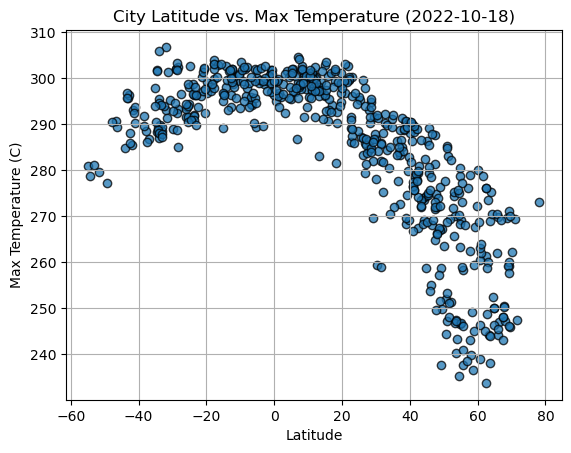

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)



# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

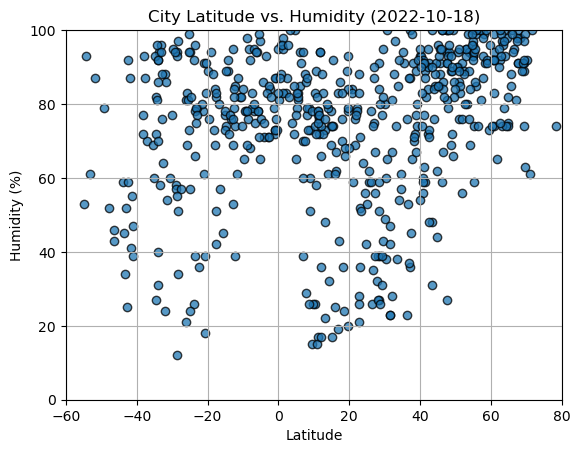

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Set custom ranges for axes
plt.xlim(-60, 80)
plt.ylim(0, 100)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

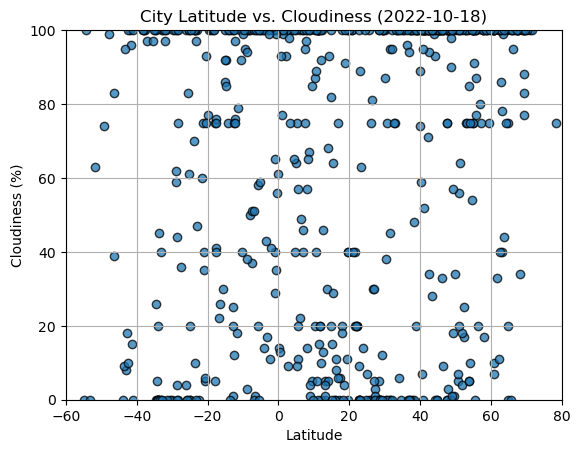

In [19]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Set custom ranges for axes
plt.xlim(-60, 80)
plt.ylim(0, 100)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

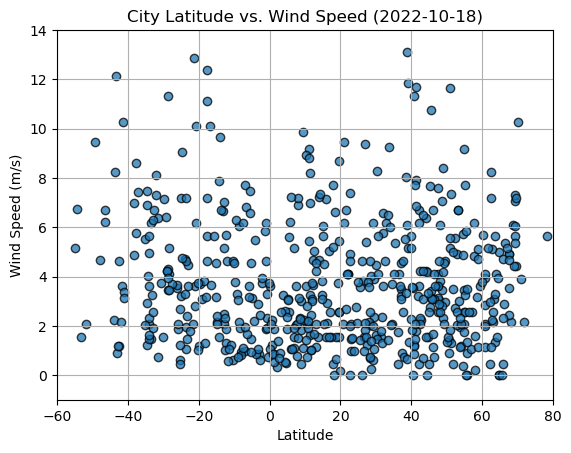

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Set custom ranges for axes
plt.xlim(-60, 80)
plt.ylim(-1, 14)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, x_label, y_label, title, file_name):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate the regression line values
    regress_values = x_values * slope + intercept

    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)

    # Plot regression line
    plt.plot(x_values, regress_values, "r-", label="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))

    # Label plot
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()

    # Save the figure
    plt.savefig(file_name)

    # Show plot
    plt.show()

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,gagliano del capo,39.8442,18.3695,282.83,93,89,5.66,IT,1702257885
3,sihanoukville,10.6093,103.5296,300.12,89,40,2.06,KH,1702257885
4,longyearbyen,78.2186,15.6401,273.06,74,75,5.66,SJ,1702257784
8,naraina,26.7833,75.2000,285.98,35,0,1.53,IN,1702257885
9,udachny,66.4167,112.4000,247.08,95,100,5.35,RU,1702257770


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,297.29,87,35,3.30,EC,1702257885
2,pirane,-25.7324,-59.1088,293.77,83,0,1.86,AR,1702257885
5,atafu village,-8.5421,-172.5159,301.93,76,100,6.05,TK,1702257885
6,blackmans bay,-43.0167,147.3167,295.66,52,8,0.89,AU,1702257885
7,ibotirama,-12.1853,-43.2206,300.19,39,76,1.32,BR,1702257885


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8384338284637926


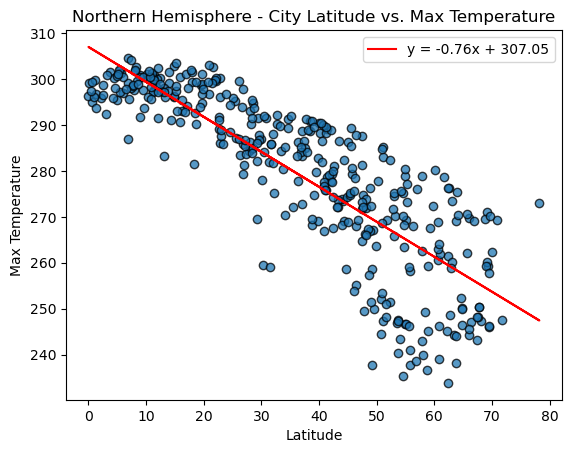

In [28]:
# Linear regression on Northern Hemisphere
def plot_linear_regression(x_values, y_values, x_label, y_label, title, file_name):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)

    # Plot regression line
    plt.plot(x_values, regress_values, "r-", label=line_eq)

    # Label plot
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()

    # Print the r-value
    print(f"The r-value is: {rvalue}")

    # Save the figure
    plt.savefig(file_name)

    # Show plot
    plt.show()

# Perform linear regression and plot for Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temperature", "Northern Hemisphere - City Latitude vs. Max Temperature", "output_data/Regression_Northern_MaxTemp.png")

The r-value is: 0.6083010269898359


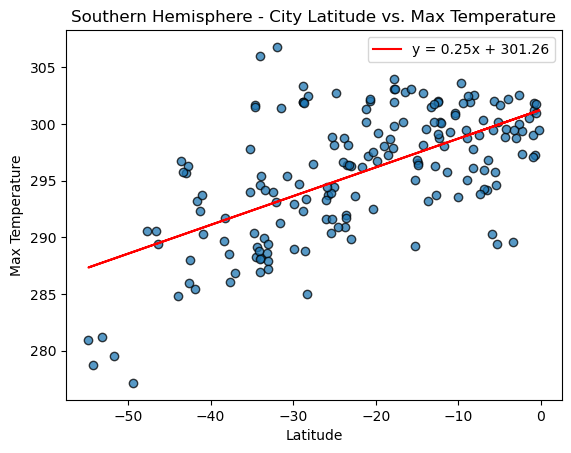

In [29]:
# Linear regression on Southern Hemisphere
def plot_linear_regression(x_values, y_values, x_label, y_label, title, file_name):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)

    # Plot regression line
    plt.plot(x_values, regress_values, "r-", label=line_eq)

    # Label plot
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()

    # Print the r-value
    print(f"The r-value is: {rvalue}")

    # Save the figure
    plt.savefig(file_name)

    # Show plot
    plt.show()
    
    # Perform linear regression and plot for Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temperature", "Southern Hemisphere - City Latitude vs. Max Temperature", "output_data/Regression_Southern_MaxTemp.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3596856808515797


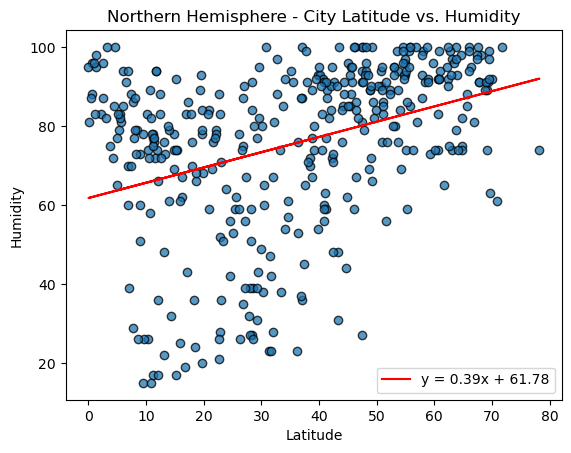

In [30]:
# Northern Hemisphere
def plot_linear_regression(x_values, y_values, x_label, y_label, title, file_name):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)

    # Plot regression line
    plt.plot(x_values, regress_values, "r-", label=line_eq)

    # Label plot
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()

    # Print the r-value
    print(f"The r-value is: {rvalue}")

    # Save the figure
    plt.savefig(file_name)

    # Show plot
    plt.show()
    
    # Perform linear regression and plot for Northern Hemisphere - Humidity vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity", "Northern Hemisphere - City Latitude vs. Humidity", "output_data/Regression_Northern_Humidity.png")

The r-value is: 0.28257999232492237


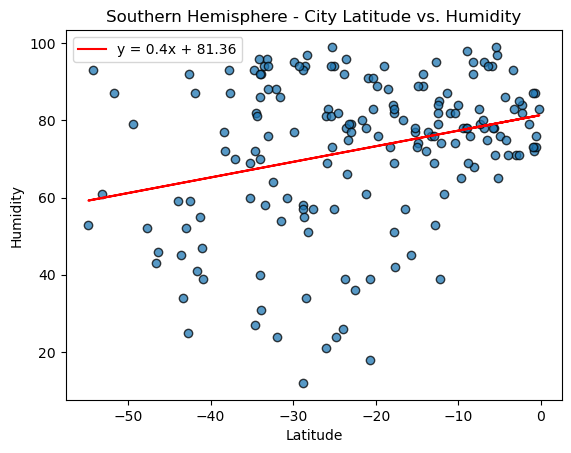

In [31]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity", "Southern Hemisphere - City Latitude vs. Humidity", "output_data/Regression_Southern_Humidity.png")



**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.24952899078958907


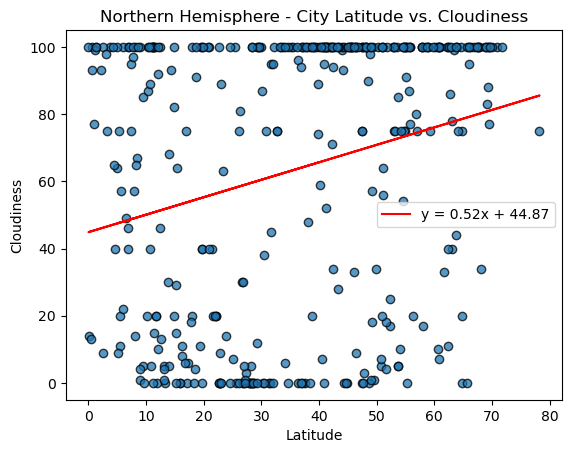

In [32]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "Northern Hemisphere - City Latitude vs. Cloudiness", "output_data/Regression_Northern_Cloudiness.png")


The r-value is: 0.146417735835174


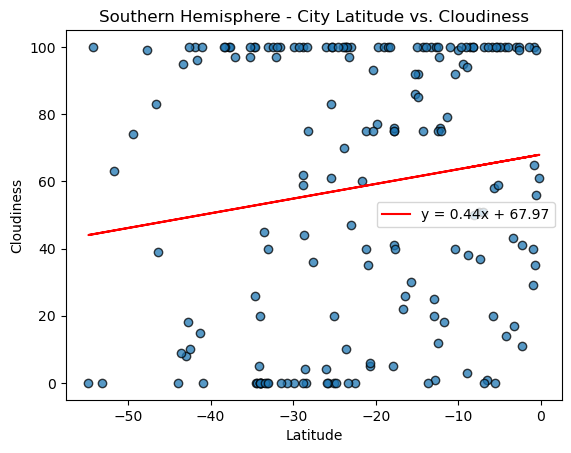

In [33]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "Southern Hemisphere - City Latitude vs. Cloudiness", "output_data/Regression_Southern_Cloudiness.png")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.12599667121452876


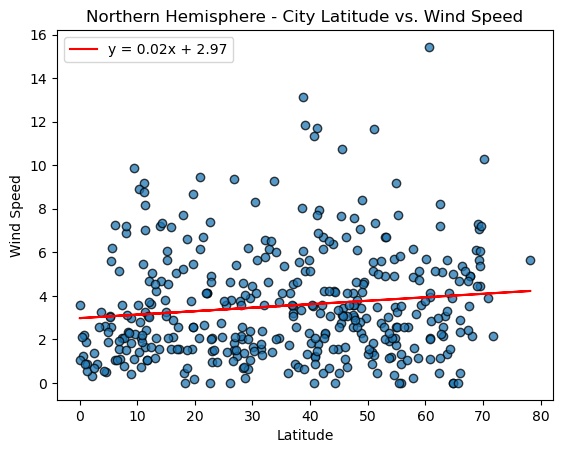

In [34]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "Northern Hemisphere - City Latitude vs. Wind Speed", "output_data/Regression_Northern_WindSpeed.png")


The r-value is: 0.12599667121452876


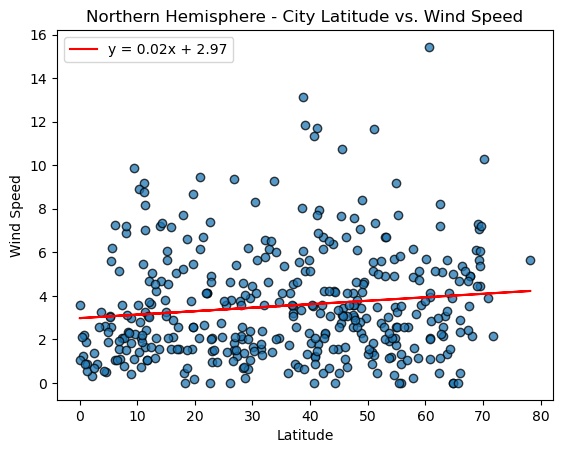

In [35]:
# Southern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "Northern Hemisphere - City Latitude vs. Wind Speed", "output_data/Regression_Northern_WindSpeed.png")


**Discussion about the linear relationship:** YOUR RESPONSE HERE